In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
HalfCheetah_v2_path = r"C:\Users\pc-admin\Github Repos\spinup_data\2019-06-15_dbedpg_debug\2019-06-15_18-42-03-dbedpg_debug_s3"
HalfCheetah_v2_path = r"C:\Users\pc-admin\Github Repos\spinup_data\2019-06-16_dbedpg_HalfCheetah_randomAC\2019-06-16_01-27-16-dbedpg_HalfCheetah_randomAC_s3"
HalfCheetah_v2_path =r"C:\Users\pc-admin\Github Repos\spinup_data\2019-06-16_dbedpg_HalfCheetah_unvertaintySampledAction\2019-06-16_12-06-41-dbedpg_HalfCheetah_unvertaintySampledAction_s3"


In [54]:
HalfCheetah_v2_progress_df = pd.read_csv(HalfCheetah_v2_path+r'\progress.txt',  sep='\t')
HalfCheetah_v2_progress_df.columns

Index(['Epoch', 'AverageEpRet', 'StdEpRet', 'MaxEpRet', 'MinEpRet',
       'AverageTestEpRet', 'StdTestEpRet', 'MaxTestEpRet', 'MinTestEpRet',
       'EpLen',
       ...
       'MinLossPi18', 'AverageLossQ19', 'StdLossQ19', 'MaxLossQ19',
       'MinLossQ19', 'AverageLossPi19', 'StdLossPi19', 'MaxLossPi19',
       'MinLossPi19', 'Time'],
      dtype='object', length=173)

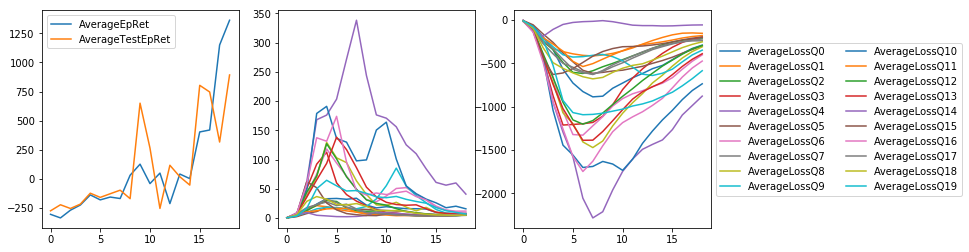

In [55]:
fig, axes = plt.subplots(1,3)
fig.set_figwidth(12)
fig.set_figheight(4)

axes[0].plot(HalfCheetah_v2_progress_df['AverageEpRet'])
axes[0].plot(HalfCheetah_v2_progress_df['AverageTestEpRet'])
axes[0].legend(['AverageEpRet', 'AverageTestEpRet'])

lossQ_legend = []
for i in range(20):
    axes[1].plot(HalfCheetah_v2_progress_df['AverageLossQ{}'.format(i)])
    lossQ_legend.append('AverageLossQ{}'.format(i))

    
for i in range(20):
    axes[2].plot(HalfCheetah_v2_progress_df['AverageLossPi{}'.format(i)])

axes[2].legend(lossQ_legend, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

In [41]:
ensemble_size = 20
HalfCheetah_V2_AC_df = []
for i in range(ensemble_size):
    HalfCheetah_V2_AC_df.append(pd.read_csv(HalfCheetah_v2_path+r'\exp_log_ac_{}.txt'.format(i),  sep='\t'))

In [42]:
HalfCheetah_V2_AC_df[0].columns

Index(['Epoch', 'Step', 'o_0', 'o_1', 'o_2', 'o_3', 'o_4', 'o_5', 'o_6', 'o_7',
       'o_8', 'o_9', 'o_10', 'o_11', 'o_12', 'o_13', 'o_14', 'o_15', 'o_16',
       'a_0', 'a_1', 'a_2', 'a_3', 'a_4', 'a_5', 'r', 'o2_0', 'o2_1', 'o2_2',
       'o2_3', 'o2_4', 'o2_5', 'o2_6', 'o2_7', 'o2_8', 'o2_9', 'o2_10',
       'o2_11', 'o2_12', 'o2_13', 'o2_14', 'o2_15', 'o2_16', 'd', 'Time'],
      dtype='object')

In [56]:
HalfCheetah_v2_path = r"C:\Users\pc-admin\Github Repos\spinup_data\2019-06-16_dbedpg_HalfCheetah_randomAC\2019-06-16_01-27-16-dbedpg_HalfCheetah_randomAC_s3"

In [57]:
HalfCheetah_v2_progress_df = pd.read_csv(HalfCheetah_v2_path+r'\progress.txt',  sep='\t')
HalfCheetah_v2_progress_df.columns

Index(['Epoch', 'AverageEpRet', 'StdEpRet', 'MaxEpRet', 'MinEpRet',
       'AverageTestEpRet', 'StdTestEpRet', 'MaxTestEpRet', 'MinTestEpRet',
       'EpLen',
       ...
       'MinLossPi18', 'AverageLossQ19', 'StdLossQ19', 'MaxLossQ19',
       'MinLossQ19', 'AverageLossPi19', 'StdLossPi19', 'MaxLossPi19',
       'MinLossPi19', 'Time'],
      dtype='object', length=173)

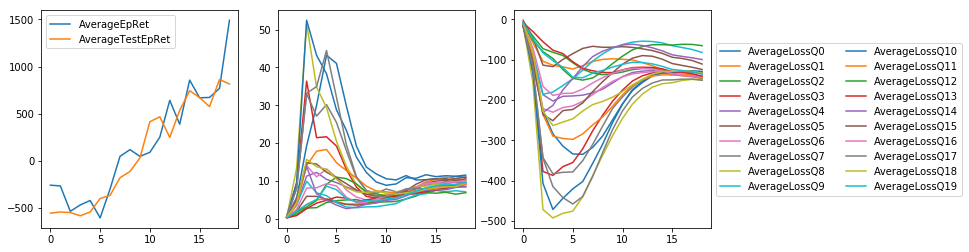

In [59]:
def plot_data(HalfCheetah_v2_progress_df):
    fig, axes = plt.subplots(1,3)
    fig.set_figwidth(12)
    fig.set_figheight(4)

    axes[0].plot(HalfCheetah_v2_progress_df['AverageEpRet'])
    axes[0].plot(HalfCheetah_v2_progress_df['AverageTestEpRet'])
    axes[0].legend(['AverageEpRet', 'AverageTestEpRet'])

    lossQ_legend = []
    for i in range(20):
        axes[1].plot(HalfCheetah_v2_progress_df['AverageLossQ{}'.format(i)])
        lossQ_legend.append('AverageLossQ{}'.format(i))


    for i in range(20):
        axes[2].plot(HalfCheetah_v2_progress_df['AverageLossPi{}'.format(i)])

    axes[2].legend(lossQ_legend, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
    
plot_data(HalfCheetah_v2_progress_df[:19])
# plot_data(HalfCheetah_v2_progress_df)

## Ensemble

### Take action with highest predicted Q

In [107]:
HalfCheetah_v2_path_20ac = r"C:\Users\Lingheng\Google Drive\git_repos\spinup_data\2019-06-27_dbedpg_distributed_debug\2019-06-27_14-45-30-dbedpg_distributed_debug_s3"
HalfCheetah_v2_path_1ac_0 = r"C:\Users\Lingheng\Google Drive\git_repos\spinup_data\2019-06-27_dbedpg_distributed_1AC\2019-06-27_20-43-44-dbedpg_distributed_1AC_s3"
HalfCheetah_v2_path_1ac_1 = r"C:\Users\Lingheng\Google Drive\git_repos\spinup_data\2019-06-27_dbedpg_distributed_1AC\2019-06-27_21-36-31-dbedpg_distributed_1AC_s3"
HalfCheetah_v2_path_1ac_2 = r"C:\Users\Lingheng\Google Drive\git_repos\spinup_data\2019-06-28_dbedpg_distributed_1AC\2019-06-28_00-11-30-dbedpg_distributed_1AC_s3"

In [108]:
HalfCheetah_v2_path_2ac_highestQWithoutActNoise = r"C:\Users\Lingheng\Google Drive\git_repos\spinup_data\2019-06-28_dbedpg_shared_replay_buff_2AC_actWithHighestQWithoutActNoise\2019-06-28_15-40-29-dbedpg_shared_replay_buff_2AC_actWithHighestQWithoutActNoise_s3"


In [109]:
HalfCheetah_v2_progress_df_20ac = pd.read_csv(HalfCheetah_v2_path_20ac+r'\progress.txt',  sep='\t')
HalfCheetah_v2_progress_df_1ac_0 = pd.read_csv(HalfCheetah_v2_path_1ac_0+r'\progress.txt',  sep='\t')
HalfCheetah_v2_progress_df_1ac_1 = pd.read_csv(HalfCheetah_v2_path_1ac_1+r'\progress.txt',  sep='\t')
HalfCheetah_v2_progress_df_1ac_2 = pd.read_csv(HalfCheetah_v2_path_1ac_2+r'\progress.txt',  sep='\t')
HalfCheetah_v2_progress_df_2ac_highestQWithoutActNoise = pd.read_csv(HalfCheetah_v2_path_2ac_highestQWithoutActNoise+r'\progress.txt',  sep='\t')


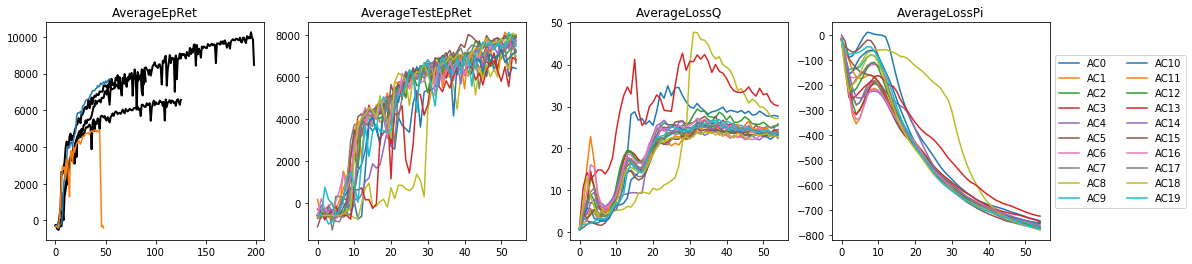

In [111]:
# def plot_data(HalfCheetah_v2_progress_df_1ac, HalfCheetah_v2_progress_df_20ac, ensemble_size=20):
ensemble_size=20
fig, axes = plt.subplots(1,4)
fig.set_figwidth(18)
fig.set_figheight(4)

axes[0].plot(HalfCheetah_v2_progress_df_1ac_0['AverageEpRet'], c='k', linewidth=2)
axes[0].plot(HalfCheetah_v2_progress_df_1ac_1['AverageEpRet'], c='k', linewidth=2)
axes[0].plot(HalfCheetah_v2_progress_df_1ac_2['AverageEpRet'], c='k', linewidth=2)
axes[0].plot(HalfCheetah_v2_progress_df_20ac['AverageEpRet'])
axes[0].plot(HalfCheetah_v2_progress_df_2ac_highestQWithoutActNoise['AverageEpRet'])
axes[0].set_title('AverageEpRet')

# axes[1].plot(HalfCheetah_v2_progress_df_1ac_0['AverageTestEpRetAC0'], c='k', linewidth=2)
# axes[1].plot(HalfCheetah_v2_progress_df_1ac_1['AverageTestEpRetAC0'], c='k', linewidth=2)
# axes[1].plot(HalfCheetah_v2_progress_df_1ac_2['AverageTestEpRetAC0'], c='k', linewidth=2)
for i in range(ensemble_size):
    axes[1].plot(HalfCheetah_v2_progress_df_20ac['AverageTestEpRetAC{}'.format(i)])
axes[1].set_title('AverageTestEpRet')

# axes[2].plot(HalfCheetah_v2_progress_df_1ac_0['AverageLossQ0'], c='k', linewidth=2)
# axes[2].plot(HalfCheetah_v2_progress_df_1ac_1['AverageLossQ0'], c='k', linewidth=2)
# axes[2].plot(HalfCheetah_v2_progress_df_1ac_2['AverageLossQ0'], c='k', linewidth=2)
for i in range(ensemble_size):
    axes[2].plot(HalfCheetah_v2_progress_df_20ac['AverageLossQ{}'.format(i)])
axes[2].set_title('AverageLossQ')

# axes[3].plot(HalfCheetah_v2_progress_df_1ac_0['AverageLossPi0'], c='k', linewidth=2)
# axes[3].plot(HalfCheetah_v2_progress_df_1ac_1['AverageLossPi0'], c='k', linewidth=2)
# axes[3].plot(HalfCheetah_v2_progress_df_1ac_2['AverageLossPi0'], c='k', linewidth=2)
for i in range(ensemble_size):
    axes[3].plot(HalfCheetah_v2_progress_df_20ac['AverageLossPi{}'.format(i)])
axes[3].set_title('AverageLossPi')

axes[3].legend(['AC{}'.format(i) for i in range(ensemble_size)], loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
    
# plot_data(HalfCheetah_v2_progress_df_1ac, HalfCheetah_v2_progress_df_20ac, ensemble_size=20)
# plot_data(HalfCheetah_v2_progress_df_1ac, ensemble_size=1)



## Single Actor-Critic

In [100]:
HalfCheetah_v2_progress_df_2ac_highestQWithoutActNoise.columns

Index(['Epoch', 'AverageEpRet', 'StdEpRet', 'MaxEpRet', 'MinEpRet', 'EpLen',
       'AverageTestEpRetAC0', 'StdTestEpRetAC0', 'MaxTestEpRetAC0',
       'MinTestEpRetAC0', 'TestEpLenAC0', 'AverageTestEpRetAC1',
       'StdTestEpRetAC1', 'MaxTestEpRetAC1', 'MinTestEpRetAC1', 'TestEpLenAC1',
       'TotalEnvInteracts', 'AverageLossQ0', 'StdLossQ0', 'MaxLossQ0',
       'MinLossQ0', 'AverageLossPi0', 'StdLossPi0', 'MaxLossPi0', 'MinLossPi0',
       'AverageLossQ1', 'StdLossQ1', 'MaxLossQ1', 'MinLossQ1',
       'AverageLossPi1', 'StdLossPi1', 'MaxLossPi1', 'MinLossPi1',
       'AverageEpVarQ', 'StdEpVarQ', 'MaxEpVarQ', 'MinEpVarQ', 'Time'],
      dtype='object')

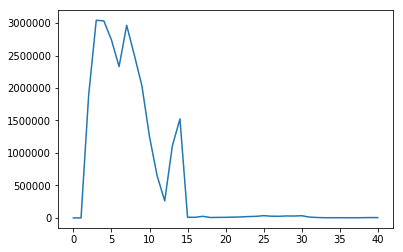

In [103]:
fig, axes = plt.subplots(1,1)
axes.plot(HalfCheetah_v2_progress_df_2ac_highestQWithoutActNoise['AverageEpVarQ'])

In [104]:
HalfCheetah_v2_experience_df_2ac_highestQWithoutActNoise = pd.read_csv(HalfCheetah_v2_path_2ac_highestQWithoutActNoise+r'\exp_log_ac_ensemble.txt',  sep='\t')

In [105]:
HalfCheetah_v2_experience_df_2ac_highestQWithoutActNoise.columns

Index(['Epoch', 'Step', 'o_0', 'o_1', 'o_2', 'o_3', 'o_4', 'o_5', 'o_6', 'o_7',
       'o_8', 'o_9', 'o_10', 'o_11', 'o_12', 'o_13', 'o_14', 'o_15', 'o_16',
       'a_0', 'a_1', 'a_2', 'a_3', 'a_4', 'a_5', 'r', 'o2_0', 'o2_1', 'o2_2',
       'o2_3', 'o2_4', 'o2_5', 'o2_6', 'o2_7', 'o2_8', 'o2_9', 'o2_10',
       'o2_11', 'o2_12', 'o2_13', 'o2_14', 'o2_15', 'o2_16', 'var_q_0', 'd',
       'Time'],
      dtype='object')

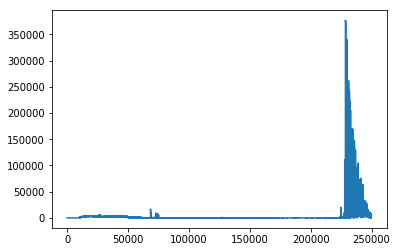

In [106]:
fig, axes = plt.subplots(1,1)
axes.plot(HalfCheetah_v2_experience_df_2ac_highestQWithoutActNoise['var_q_0'])

# HalfCheetah-v2

In [138]:
AC_size_1 = r"C:\Users\Lingheng\Google Drive\git_repos\spinup_data\2019-06-28_dbedpg_shared_replay_buff_1AC\2019-06-28_14-43-24-dbedpg_shared_replay_buff_1AC_s3"
AC_size_2 = r"C:\Users\Lingheng\Google Drive\git_repos\spinup_data\2019-06-28_dbedpg_shared_replay_buff_2AC_actWithHighestQWithoutActNoise\2019-06-28_15-40-29-dbedpg_shared_replay_buff_2AC_actWithHighestQWithoutActNoise_s3"
AC_size_3 = r"C:\Users\Lingheng\Google Drive\git_repos\spinup_data\2019-06-28_dbedpg_shared_replay_buff_3AC_actWithHighestQWithoutActNoise\2019-06-28_16-19-17-dbedpg_shared_replay_buff_3AC_actWithHighestQWithoutActNoise_s3"
AC_size_3_2 = r"C:\Users\Lingheng\Google Drive\git_repos\spinup_data\2019-06-28_dbedpg_shared_replay_buff_4AC_actWithHighestQWithoutActNoise\2019-06-28_17-09-46-dbedpg_shared_replay_buff_4AC_actWithHighestQWithoutActNoise_s3"
AC_size_5 = r"C:\Users\Lingheng\Google Drive\git_repos\spinup_data\2019-06-28_dbedpg_shared_replay_buff_5AC_actWithHighestQWithoutActNoise\2019-06-28_21-03-04-dbedpg_shared_replay_buff_5AC_actWithHighestQWithoutActNoise_s3"
AC_size_10 = r"C:\Users\Lingheng\Google Drive\git_repos\spinup_data\2019-06-28_dbedpg_shared_replay_buff_10AC_actWithHighestQWithoutActNoise\2019-06-28_18-06-47-dbedpg_shared_replay_buff_10AC_actWithHighestQWithoutActNoise_s3"


In [139]:
AC_size_1_df = pd.read_csv(AC_size_1+r'\progress.txt',  sep='\t')
AC_size_2_df = pd.read_csv(AC_size_2+r'\progress.txt',  sep='\t')
AC_size_3_df = pd.read_csv(AC_size_3+r'\progress.txt',  sep='\t')
AC_size_3_2_df = pd.read_csv(AC_size_3_2+r'\progress.txt',  sep='\t')
AC_size_5_df = pd.read_csv(AC_size_5+r'\progress.txt',  sep='\t')
AC_size_10_df = pd.read_csv(AC_size_10+r'\progress.txt',  sep='\t')



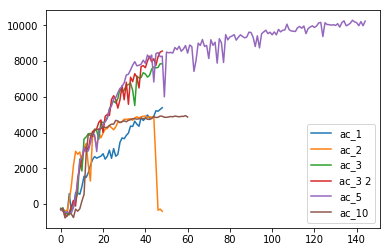

In [140]:
fig, axes = plt.subplots(1,1)
axes.plot(AC_size_1_df['AverageEpRet'])
axes.plot(AC_size_2_df['AverageEpRet'])
axes.plot(AC_size_3_df['AverageEpRet'])
axes.plot(AC_size_3_2_df['AverageEpRet'])
axes.plot(AC_size_5_df['AverageEpRet'])
axes.plot(AC_size_10_df['AverageEpRet'])
axes.legend(['ac_1', 'ac_2', 'ac_3', 'ac_3 2', 'ac_5', 'ac_10'])